In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
URL_DATA = 'https://storage.data.gov.my/demography/births.parquet'

data = pd.read_parquet(URL_DATA)
if 'date' in df.columns: data['date'] = pd.to_datetime(data['date'])

print(df)

            date     state  births
0     1920-01-01  Malaysia      96
1     1920-01-02  Malaysia     115
2     1920-01-03  Malaysia     111
3     1920-01-04  Malaysia     101
4     1920-01-05  Malaysia      95
...          ...       ...     ...
37828 2023-07-27  Malaysia    1199
37829 2023-07-28  Malaysia    1220
37830 2023-07-29  Malaysia     927
37831 2023-07-30  Malaysia     938
37832 2023-07-31  Malaysia    1098

[37833 rows x 3 columns]


In [12]:
data['year'] = data['date'].dt.year

In [14]:
data.head(10)

,date,state,births,year
0,1920-01-01,Malaysia,96,1920
1,1920-01-02,Malaysia,115,1920
2,1920-01-03,Malaysia,111,1920
3,1920-01-04,Malaysia,101,1920
4,1920-01-05,Malaysia,95,1920
5,1920-01-06,Malaysia,91,1920
6,1920-01-07,Malaysia,85,1920
7,1920-01-08,Malaysia,83,1920
8,1920-01-09,Malaysia,96,1920
9,1920-01-10,Malaysia,123,1920


In [423]:
#Helper function to map the masihi year to zodiac year
zodiacs = ['Monkey', 'Rooster', 'Dog', 'Pig', 'Rat', 'Ox', 'Tiger', 'Rabbit', 'Dragon', 'Snake', 'Horse', 'Goat']
def get_zodiac_year(year):
    return zodiacs[(year - 1920) % 12]

In [199]:
#Helper function to get color for dragon zodiac year
def get_dragon_color(year):
    if (year - 1920) % 12 == 8:
        return 'Dragon'
    else:
        return 'Others'

In [201]:
data['zodiac'] = data['year'].apply(get_zodiac_year)

In [217]:
data['zodiac_year'] = data['year'].apply(get_dragon_color)

In [219]:
data.head(3)

,date,state,births,year,zodiac,zodiac_year
0,1920-01-01,Malaysia,96,1920,Monkey,Others
1,1920-01-02,Malaysia,115,1920,Monkey,Others
2,1920-01-03,Malaysia,111,1920,Monkey,Others


In [224]:
data['zodiac_year'].value_counts()

zodiac_year
Others    34905
Dragon     2928
Name: count, dtype: int64

In [425]:
data_gp_zod = data.groupby('zodiac').agg(births=('births','sum')).reset_index()

In [298]:
data_gp_zod

,zodiac,births
0,Dog,3038699
1,Dragon,2879975
2,Goat,2857378
3,Horse,2852664
4,Monkey,2954996
5,Ox,3149496
6,Pig,3119281
7,Rabbit,3015583
8,Rat,3164487
9,Rooster,2971578


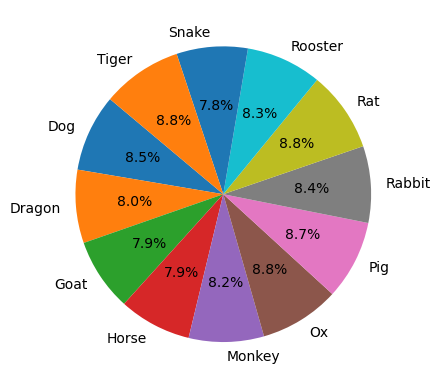

In [302]:
plt.pie(
    data_gp_zod['births'],
    autopct='%1.1f%%',
    startangle=140,
    labels=data_gp_zod['zodiac']
)
plt.show()

In [234]:
data_sub = data[data['year']>=1928]

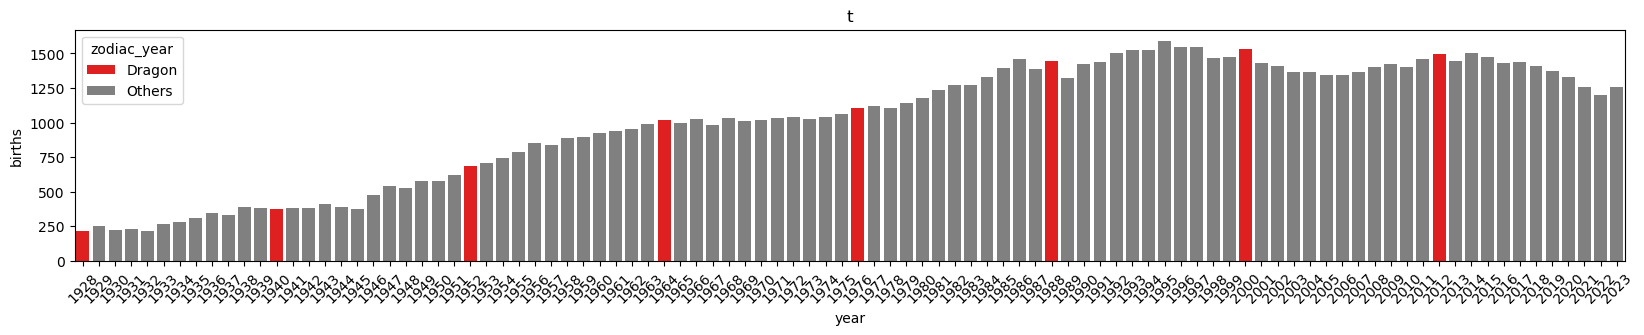

In [543]:
plt.figure(figsize=(20,3))
ax = sns.barplot(data=data_sub, x='year', y='births',errorbar=None,hue='zodiac_year',dodge=False,palette=['red','grey'])

plt.xticks(rotation=45)
plt.title('Live Annual Birth ')

plt.show()

In [258]:
URL_DATA = 'https://storage.dosm.gov.my/demography/birth_sex_ethnic.parquet'

data_eth = pd.read_parquet(URL_DATA)
if 'date' in data_eth.columns: data_eth['date'] = pd.to_datetime(data_eth['date'])

print(data_eth)

          date     sex         ethnicity       abs  rate
0   2000-01-01    both           overall  537853.0  22.9
1   2001-01-01    both           overall  505479.0  21.0
2   2002-01-01    both           overall  494538.0  20.2
3   2003-01-01    both           overall  481399.0  19.2
4   2004-01-01    both           overall  481800.0  18.9
..         ...     ...               ...       ...   ...
499 2020-01-01  female  other_noncitizen    8726.0  10.7
500 2021-01-01  female  other_noncitizen    7311.0   9.4
501 2022-01-01  female  other_noncitizen    7612.0  10.0
502 2023-01-01    male  other_noncitizen       NaN   NaN
503 2023-01-01  female  other_noncitizen       NaN   NaN

[504 rows x 5 columns]


In [260]:
data_eth['year'] = data_eth['date'].dt.year

In [314]:
data_eth['zodiac'] = data_eth['year'].apply(get_zodiac_year)

In [316]:
data_eth['zodiac_year'] = data_eth['year'].apply(get_dragon_color)

In [780]:
remove_list = ['chinese','overall','other_noncitizen']

data_eth_ci = data_eth[(data_eth['sex']=='both') & (data_eth['ethnicity']=='chinese')]
data_eth_in = data_eth[(data_eth['sex']=='both') & (data_eth['ethnicity']=='indian')]
data_eth_my = data_eth[(data_eth['sex']=='both') & (data_eth['ethnicity']=='bumi_malay')]
data_eth_ot = data_eth[(data_eth['sex']=='both') & ~(data_eth['ethnicity'].isin(remove_list))]
data_eth_all = data_eth[(data_eth['ethnicity']!='other_noncitizen') & (data_eth['ethnicity']!='overall')]

In [627]:
data_eth_all['ethnicity'].value_counts()

ethnicity
bumi_malay       72
bumi_other       72
chinese          72
indian           72
other_citizen    72
Name: count, dtype: int64

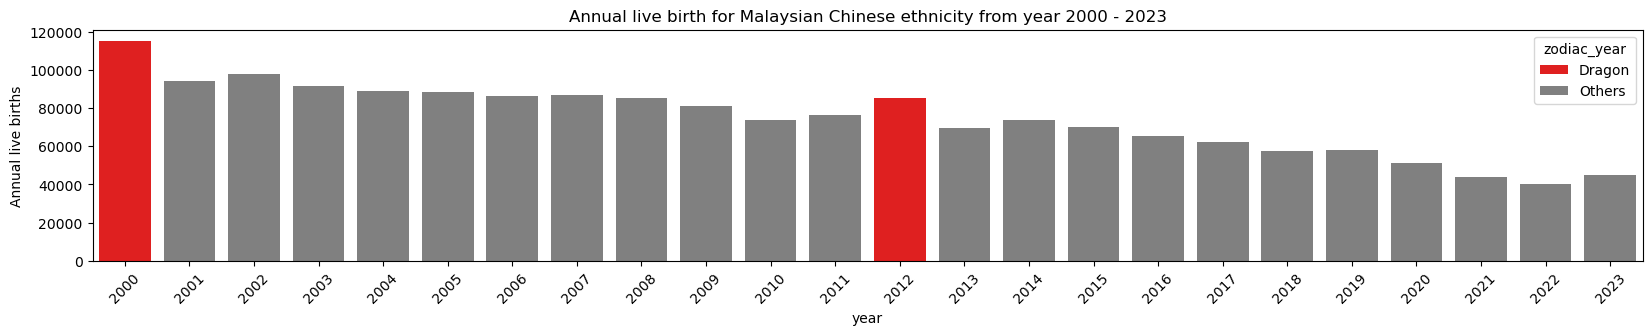

In [776]:
plt.figure(figsize=(20,3))
ax = sns.barplot(data=data_eth_ci, x='year', y='abs',errorbar=None,hue='zodiac_year',dodge=False,palette=['red','grey'])

plt.xticks(rotation=45)

plt.title('Annual live birth for Malaysian Chinese ethnicity from year 2000 - 2023')
plt.ylabel('Annual live births')
plt.show()

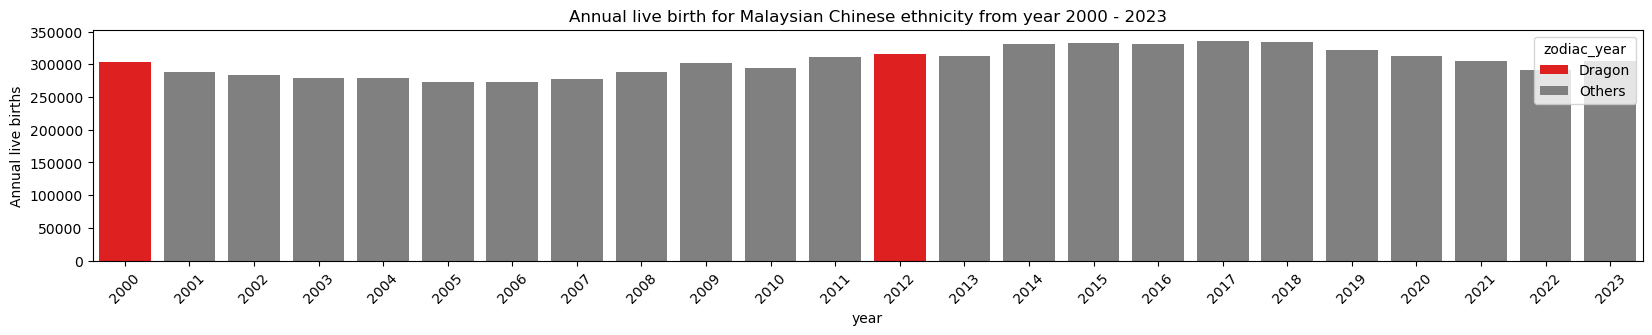

In [784]:
plt.figure(figsize=(20,3))
ax = sns.barplot(data=data_eth_my, x='year', y='abs',errorbar=None,hue='zodiac_year',dodge=False,palette=['red','grey'])

plt.xticks(rotation=45)

plt.title('Annual live birth for Malaysian Chinese ethnicity from year 2000 - 2023')
plt.ylabel('Annual live births')
plt.show()

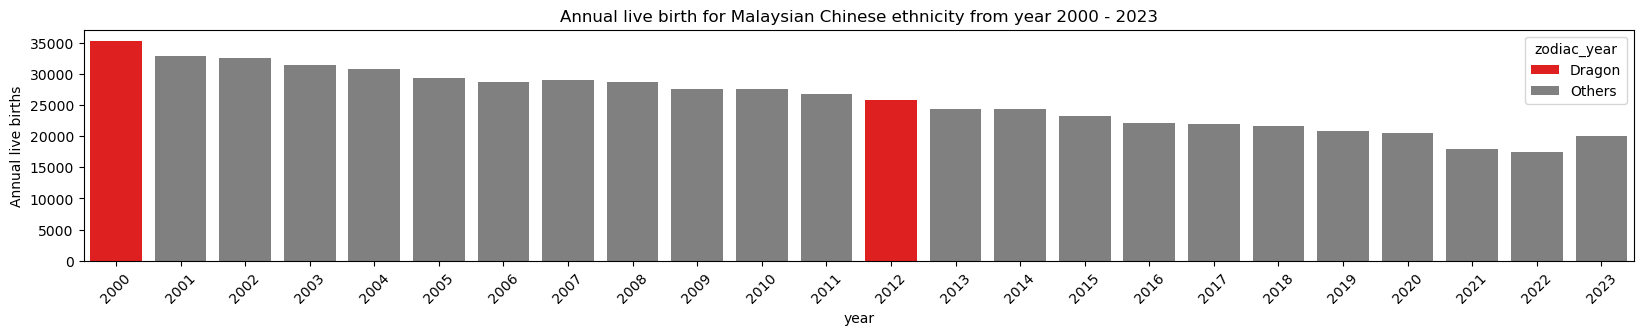

In [786]:
plt.figure(figsize=(20,3))
ax = sns.barplot(data=data_eth_in, x='year', y='abs',errorbar=None,hue='zodiac_year',dodge=False,palette=['red','grey'])

plt.xticks(rotation=45)

plt.title('Annual live birth for Malaysian Chinese ethnicity from year 2000 - 2023')
plt.ylabel('Annual live births')
plt.show()

In [633]:
data_eth_ci_gp_zod

,zodiac,births
0,Monkey,154813.0
1,Rooster,150671.0
2,Dog,143961.0
3,Pig,144931.0
4,Rat,136854.0
5,Ox,124912.0
6,Tiger,114317.0
7,Rabbit,121460.0
8,Dragon,200848.0
9,Snake,163596.0


In [704]:
def zodiac_categorizer(df):
    df_gp_zod = df.groupby('zodiac').agg(births=('abs','sum')).reset_index()
    df_gp_zod['zodiac'] = pd.Categorical(df_gp_zod['zodiac'], categories=zodiacs,ordered=True)
    df_gp_zod = df_gp_zod.sort_values(by='zodiac').reset_index(drop=True)
    return df_gp_zod

In [720]:
data_eth_all_gp_zod = zodiac_categorizer(data_eth_all)
data_eth_ci_gp_zod = zodiac_categorizer(data_eth_ci)
data_eth_ot_gp_zod = zodiac_categorizer(data_eth_ot)

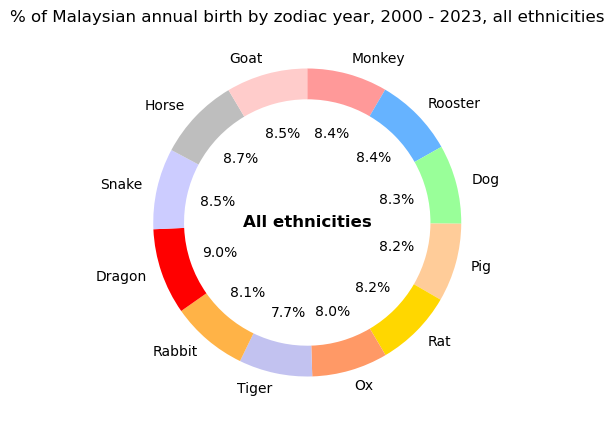

In [724]:
plt.figure(figsize=(10,5))

zod_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF9966', '#C2C2F0', '#FFB347', 'red', '#CCCCFF', '#BEBEBE', '#FFCCCB']

plt.pie(
    data_eth_all_gp_zod['births'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    labels=data_eth_all_gp_zod['zodiac'],
    wedgeprops={'width': 0.2},
    colors=zod_colors
)

plt.text(0, 0, 'All ethnicities', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('% of Malaysian annual birth by zodiac year, 2000 - 2023, all ethnicities')
plt.show()

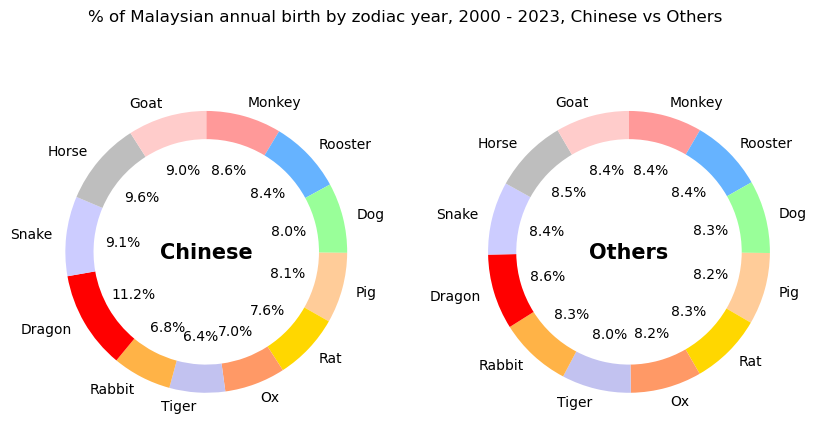

In [722]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

zod_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#FF9966', '#C2C2F0', '#FFB347', 'red', '#CCCCFF', '#BEBEBE', '#FFCCCB']

axes[0].pie(
    data_eth_ci_gp_zod['births'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    labels=data_eth_ci_gp_zod['zodiac'],
    wedgeprops={'width': 0.2},
    colors=zod_colors
)

axes[1].pie(
    data_eth_ot_gp_zod['births'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    labels=data_eth_ot_gp_zod['zodiac'],
    wedgeprops={'width': 0.2},
    colors=zod_colors
)

axes[0].text(0, 0, 'Chinese', ha='center', va='center', fontsize=15, fontweight='bold')
axes[1].text(0, 0, 'Others', ha='center', va='center', fontsize=15, fontweight='bold')

plt.suptitle('% of Malaysian annual birth by zodiac year, 2000 - 2023, Chinese vs Others')
plt.show()